In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## V1 :Replacing missing values with median

In [2]:
df = pd.read_csv("file2.csv")
df

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_558/4279301476.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("file2.csv")


,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,DISCOVERY_DATE_Greg,CONT_DATE_Greg,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT
0,0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300.0,2453403.5,1730.0,2005-02-02,2005-02-02,2,Wednesday,0.0,4.500000
1,1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,845.0,2453137.5,1530.0,2004-05-12,2004-05-12,5,Wednesday,0.0,6.750000
2,2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921.0,2453156.5,2024.0,2004-05-31,2004-05-31,5,Monday,0.0,1.050000
3,3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600.0,2453189.5,1400.0,2004-06-28,2004-07-03,6,Monday,5.0,118.000000
4,4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600.0,2453189.5,1200.0,2004-06-28,2004-07-03,6,Monday,5.0,116.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,2015,Missing/Undefined,13.0,40.481637,-122.389375,CA,0.01,2457291.5,1726.0,2457291.5,1843.0,2015-09-26,2015-09-26,9,Saturday,0.0,1.283333
1880461,1880461,2015,Miscellaneous,9.0,37.617619,-120.938570,CA,0.20,2457300.5,126.0,NaN,NaN,2015-10-05,NaN,10,Monday,NaN,NaN
1880462,1880462,2015,Missing/Undefined,13.0,37.617619,-120.938570,CA,0.10,2457144.5,2052.0,NaN,NaN,2015-05-02,NaN,5,Saturday,NaN,NaN
1880463,1880463,2015,Missing/Undefined,13.0,37.672235,-120.898356,CA,2.00,2457309.5,2309.0,NaN,NaN,2015-10-14,NaN,10,Wednesday,NaN,NaN


In [3]:
df['DISCOVERY YEAR'] = pd.DatetimeIndex(df['DISCOVERY_DATE_Greg']).year
df

,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,DISCOVERY_DATE_Greg,CONT_DATE_Greg,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT,DISCOVERY YEAR
0,0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300.0,2453403.5,1730.0,2005-02-02,2005-02-02,2,Wednesday,0.0,4.500000,2005
1,1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,845.0,2453137.5,1530.0,2004-05-12,2004-05-12,5,Wednesday,0.0,6.750000,2004
2,2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921.0,2453156.5,2024.0,2004-05-31,2004-05-31,5,Monday,0.0,1.050000,2004
3,3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600.0,2453189.5,1400.0,2004-06-28,2004-07-03,6,Monday,5.0,118.000000,2004
4,4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600.0,2453189.5,1200.0,2004-06-28,2004-07-03,6,Monday,5.0,116.000000,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,2015,Missing/Undefined,13.0,40.481637,-122.389375,CA,0.01,2457291.5,1726.0,2457291.5,1843.0,2015-09-26,2015-09-26,9,Saturday,0.0,1.283333,2015
1880461,1880461,2015,Miscellaneous,9.0,37.617619,-120.938570,CA,0.20,2457300.5,126.0,NaN,NaN,2015-10-05,NaN,10,Monday,NaN,NaN,2015
1880462,1880462,2015,Missing/Undefined,13.0,37.617619,-120.938570,CA,0.10,2457144.5,2052.0,NaN,NaN,2015-05-02,NaN,5,Saturday,NaN,NaN,2015
1880463,1880463,2015,Missing/Undefined,13.0,37.672235,-120.898356,CA,2.00,2457309.5,2309.0,NaN,NaN,2015-10-14,NaN,10,Wednesday,NaN,NaN,2015


In [4]:
df = df.drop(columns=['Unnamed: 0','STAT_CAUSE_CODE','DISCOVERY_DATE_Greg','CONT_DATE_Greg','DISCOVERY_DATE','CONT_DATE','DISCOVERY YEAR'])
df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT
0,2005,Miscellaneous,40.036944,-121.005833,CA,0.10,1300.0,1730.0,2,Wednesday,0.0,4.500000
1,2004,Lightning,38.933056,-120.404444,CA,0.25,845.0,1530.0,5,Wednesday,0.0,6.750000
2,2004,Debris Burning,38.984167,-120.735556,CA,0.10,1921.0,2024.0,5,Monday,0.0,1.050000
3,2004,Lightning,38.559167,-119.913333,CA,0.10,1600.0,1400.0,6,Monday,5.0,118.000000
4,2004,Lightning,38.559167,-119.933056,CA,0.10,1600.0,1200.0,6,Monday,5.0,116.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,0.01,1726.0,1843.0,9,Saturday,0.0,1.283333
1880461,2015,Miscellaneous,37.617619,-120.938570,CA,0.20,126.0,NaN,10,Monday,NaN,NaN
1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,0.10,2052.0,NaN,5,Saturday,NaN,NaN
1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2.00,2309.0,NaN,10,Wednesday,NaN,NaN


In [5]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

FIRE_YEAR                     0
STAT_CAUSE_DESCR              0
LATITUDE                      0
LONGITUDE                     0
STATE                         0
FIRE_SIZE                     0
DISCOVERY_TIME           882638
CONT_TIME                972553
DISCOVERY_MONTH               0
DISCOVERY_DAY_OF_WEEK         0
DAYS_SPENT               891531
HRS_SPENT                988458
dtype: int64


,column_name,percent_missing
FIRE_YEAR,FIRE_YEAR,0.000000
STAT_CAUSE_DESCR,STAT_CAUSE_DESCR,0.000000
LATITUDE,LATITUDE,0.000000
LONGITUDE,LONGITUDE,0.000000
STATE,STATE,0.000000
FIRE_SIZE,FIRE_SIZE,0.000000
DISCOVERY_TIME,DISCOVERY_TIME,46.937220
CONT_TIME,CONT_TIME,51.718750
DISCOVERY_MONTH,DISCOVERY_MONTH,0.000000
DISCOVERY_DAY_OF_WEEK,DISCOVERY_DAY_OF_WEEK,0.000000


/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DISCOVERY_TIME', ylabel='Density'>

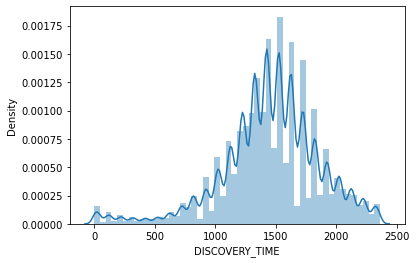

In [6]:
sns.distplot(df.DISCOVERY_TIME)

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONT_TIME', ylabel='Density'>

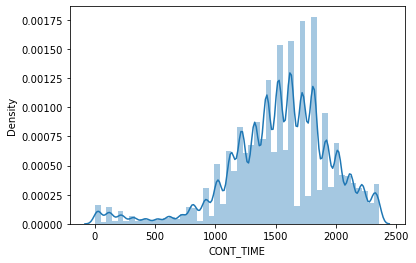

In [7]:
sns.distplot(df.CONT_TIME)

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_SPENT', ylabel='Density'>

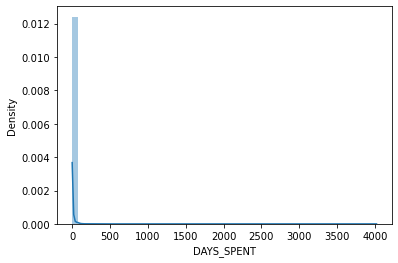

In [8]:
sns.distplot(df.DAYS_SPENT)

Should drop days spent or maybe find some sort of relation between hours spent and the target variable

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HRS_SPENT', ylabel='Density'>

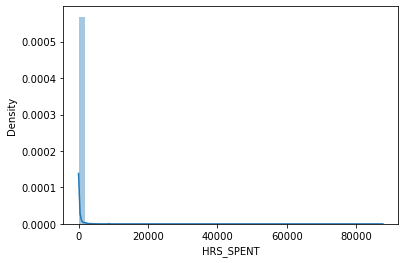

In [9]:
sns.distplot(df.HRS_SPENT)

In [10]:
df = df.fillna(df.median())

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_558/3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [11]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

FIRE_YEAR                0
STAT_CAUSE_DESCR         0
LATITUDE                 0
LONGITUDE                0
STATE                    0
FIRE_SIZE                0
DISCOVERY_TIME           0
CONT_TIME                0
DISCOVERY_MONTH          0
DISCOVERY_DAY_OF_WEEK    0
DAYS_SPENT               0
HRS_SPENT                0
dtype: int64


,column_name,percent_missing
FIRE_YEAR,FIRE_YEAR,0.0
STAT_CAUSE_DESCR,STAT_CAUSE_DESCR,0.0
LATITUDE,LATITUDE,0.0
LONGITUDE,LONGITUDE,0.0
STATE,STATE,0.0
FIRE_SIZE,FIRE_SIZE,0.0
DISCOVERY_TIME,DISCOVERY_TIME,0.0
CONT_TIME,CONT_TIME,0.0
DISCOVERY_MONTH,DISCOVERY_MONTH,0.0
DISCOVERY_DAY_OF_WEEK,DISCOVERY_DAY_OF_WEEK,0.0


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['DISCOVERY_DAY_OF_WEEK'] = le.fit_transform(df['DISCOVERY_DAY_OF_WEEK'])


In [13]:
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT
0,2005,7,40.036944,-121.005833,4,0.10,1300.0,1730.0,2,6,0.0,4.50
1,2004,6,38.933056,-120.404444,4,0.25,845.0,1530.0,5,6,0.0,6.75
2,2004,3,38.984167,-120.735556,4,0.10,1921.0,2024.0,5,1,0.0,1.05
3,2004,6,38.559167,-119.913333,4,0.10,1600.0,1400.0,6,1,5.0,118.00
4,2004,6,38.559167,-119.933056,4,0.10,1600.0,1200.0,6,1,5.0,116.00


In [14]:
x = df.drop(columns = ['STAT_CAUSE_DESCR'])
y = df['STAT_CAUSE_DESCR']

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
X_dev, X_test, y_dev, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

decision = DecisionTreeClassifier(random_state = 0)

# Train Decision Tree Classifer
decision = decision.fit(X_dev, y_dev)

#Predict the response for test dataset
y_pred = decision.predict(X_test)
print("Accuracy on the test set is:",metrics.accuracy_score(y_test, y_pred))

y_pred_dev = decision.predict(X_dev)
print("Accuracy on the development set is:",metrics.accuracy_score(y_dev, y_pred_dev))

Accuracy on the test set is: 0.4877437229621397
Accuracy on the development set is: 0.999824511490509


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.47      0.47     56291
           1       0.30      0.31      0.31     15228
           2       0.17      0.18      0.18     12233
           3       0.50      0.48      0.49     85806
           4       0.27      0.28      0.27     29522
           5       0.31      0.31      0.31      2300
           6       0.71      0.70      0.71     55693
           7       0.43      0.43      0.43     64761
           8       0.87      0.87      0.87     33345
           9       0.12      0.13      0.13      2890
          10       0.36      0.37      0.36      6691
          11       0.11      0.11      0.11     10574
          12       0.08      0.08      0.08       759

    accuracy                           0.49    376093
   macro avg       0.36      0.36      0.36    376093
weighted avg       0.49      0.49      0.49    376093



In [18]:
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_dev, y_dev)

y_pred = clf_rf.predict(X_test)
print("Accuracy on the test set is:",metrics.accuracy_score(y_test, y_pred))

y_pred_dev = clf_rf.predict(X_dev)
print("Accuracy on the development set is:",metrics.accuracy_score(y_dev, y_pred_dev))

Accuracy on the test set is: 0.5902662373402323
Accuracy on the development set is: 0.9996835888995541


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56     56291
           1       0.49      0.35      0.41     15228
           2       0.35      0.14      0.20     12233
           3       0.53      0.70      0.60     85806
           4       0.41      0.29      0.34     29522
           5       0.54      0.39      0.46      2300
           6       0.74      0.84      0.78     55693
           7       0.52      0.53      0.52     64761
           8       0.90      0.89      0.89     33345
           9       0.35      0.08      0.12      2890
          10       0.57      0.45      0.51      6691
          11       0.23      0.04      0.07     10574
          12       0.33      0.06      0.10       759

    accuracy                           0.59    376093
   macro avg       0.50      0.41      0.43    376093
weighted avg       0.57      0.59      0.57    376093



## V2 : DROPPING ALL MISSING VALUES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df = pd.read_csv("file2.csv")
df

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_772/4279301476.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("file2.csv")


,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,DISCOVERY_DATE_Greg,CONT_DATE_Greg,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT
0,0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300.0,2453403.5,1730.0,2005-02-02,2005-02-02,2,Wednesday,0.0,4.500000
1,1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,845.0,2453137.5,1530.0,2004-05-12,2004-05-12,5,Wednesday,0.0,6.750000
2,2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921.0,2453156.5,2024.0,2004-05-31,2004-05-31,5,Monday,0.0,1.050000
3,3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600.0,2453189.5,1400.0,2004-06-28,2004-07-03,6,Monday,5.0,118.000000
4,4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600.0,2453189.5,1200.0,2004-06-28,2004-07-03,6,Monday,5.0,116.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,2015,Missing/Undefined,13.0,40.481637,-122.389375,CA,0.01,2457291.5,1726.0,2457291.5,1843.0,2015-09-26,2015-09-26,9,Saturday,0.0,1.283333
1880461,1880461,2015,Miscellaneous,9.0,37.617619,-120.938570,CA,0.20,2457300.5,126.0,NaN,NaN,2015-10-05,NaN,10,Monday,NaN,NaN
1880462,1880462,2015,Missing/Undefined,13.0,37.617619,-120.938570,CA,0.10,2457144.5,2052.0,NaN,NaN,2015-05-02,NaN,5,Saturday,NaN,NaN
1880463,1880463,2015,Missing/Undefined,13.0,37.672235,-120.898356,CA,2.00,2457309.5,2309.0,NaN,NaN,2015-10-14,NaN,10,Wednesday,NaN,NaN


In [3]:
df['DISCOVERY YEAR'] = pd.DatetimeIndex(df['DISCOVERY_DATE_Greg']).year
df

,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,DISCOVERY_DATE_Greg,CONT_DATE_Greg,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT,DISCOVERY YEAR
0,0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300.0,2453403.5,1730.0,2005-02-02,2005-02-02,2,Wednesday,0.0,4.500000,2005
1,1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,845.0,2453137.5,1530.0,2004-05-12,2004-05-12,5,Wednesday,0.0,6.750000,2004
2,2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921.0,2453156.5,2024.0,2004-05-31,2004-05-31,5,Monday,0.0,1.050000,2004
3,3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600.0,2453189.5,1400.0,2004-06-28,2004-07-03,6,Monday,5.0,118.000000,2004
4,4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600.0,2453189.5,1200.0,2004-06-28,2004-07-03,6,Monday,5.0,116.000000,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,2015,Missing/Undefined,13.0,40.481637,-122.389375,CA,0.01,2457291.5,1726.0,2457291.5,1843.0,2015-09-26,2015-09-26,9,Saturday,0.0,1.283333,2015
1880461,1880461,2015,Miscellaneous,9.0,37.617619,-120.938570,CA,0.20,2457300.5,126.0,NaN,NaN,2015-10-05,NaN,10,Monday,NaN,NaN,2015
1880462,1880462,2015,Missing/Undefined,13.0,37.617619,-120.938570,CA,0.10,2457144.5,2052.0,NaN,NaN,2015-05-02,NaN,5,Saturday,NaN,NaN,2015
1880463,1880463,2015,Missing/Undefined,13.0,37.672235,-120.898356,CA,2.00,2457309.5,2309.0,NaN,NaN,2015-10-14,NaN,10,Wednesday,NaN,NaN,2015


In [4]:
df = df.drop(columns=['Unnamed: 0','STAT_CAUSE_CODE','DISCOVERY_DATE_Greg','CONT_DATE_Greg','DISCOVERY_DATE','CONT_DATE','DISCOVERY YEAR'])
df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT
0,2005,Miscellaneous,40.036944,-121.005833,CA,0.10,1300.0,1730.0,2,Wednesday,0.0,4.500000
1,2004,Lightning,38.933056,-120.404444,CA,0.25,845.0,1530.0,5,Wednesday,0.0,6.750000
2,2004,Debris Burning,38.984167,-120.735556,CA,0.10,1921.0,2024.0,5,Monday,0.0,1.050000
3,2004,Lightning,38.559167,-119.913333,CA,0.10,1600.0,1400.0,6,Monday,5.0,118.000000
4,2004,Lightning,38.559167,-119.933056,CA,0.10,1600.0,1200.0,6,Monday,5.0,116.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,0.01,1726.0,1843.0,9,Saturday,0.0,1.283333
1880461,2015,Miscellaneous,37.617619,-120.938570,CA,0.20,126.0,NaN,10,Monday,NaN,NaN
1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,0.10,2052.0,NaN,5,Saturday,NaN,NaN
1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2.00,2309.0,NaN,10,Wednesday,NaN,NaN


In [5]:
df = df.dropna()

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['DISCOVERY_DAY_OF_WEEK'] = le.fit_transform(df['DISCOVERY_DAY_OF_WEEK'])

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_772/994108183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_772/994108183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATE'] = le.fit_transform(df['STATE'])
/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_772/994108183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [7]:
df.head()
print(df.shape)

(892007, 12)


In [8]:
x = df.drop(columns = ['STAT_CAUSE_DESCR'])
y = df['STAT_CAUSE_DESCR']

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
X_dev, X_test, y_dev, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [10]:
y.unique()

array([ 7,  6,  3,  1,  4,  0,  2, 10, 11,  9, 12,  5,  8])

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

decision = DecisionTreeClassifier(random_state = 0, max_depth = 17)

# Train Decision Tree Classifer
decision = decision.fit(X_dev, y_dev)

#Predict the response for test dataset
y_test_pred = decision.predict(X_test)
print("Accuracy on the test set is:",metrics.accuracy_score(y_test, y_test_pred))

y_pred_dev = decision.predict(X_dev)
print("Accuracy on the development set is:",metrics.accuracy_score(y_dev, y_pred_dev))

Accuracy on the test set is: 0.5721124202643468
Accuracy on the development set is: 0.6793842531932932


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54     27771
           1       0.42      0.35      0.39     10366
           2       0.33      0.18      0.23      5465
           3       0.51      0.66      0.58     34401
           4       0.27      0.15      0.19      9811
           5       0.46      0.38      0.42      2053
           6       0.76      0.85      0.80     43919
           7       0.49      0.53      0.51     29506
           8       0.74      0.66      0.70      6967
           9       0.23      0.05      0.09      1548
          10       0.34      0.09      0.14      1581
          11       0.18      0.04      0.07      4495
          12       0.32      0.07      0.11       519

    accuracy                           0.57    178402
   macro avg       0.43      0.35      0.37    178402
weighted avg       0.55      0.57      0.55    178402



In [13]:
# feature importance 

In [14]:
x.head(3)

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_TIME,CONT_TIME,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK,DAYS_SPENT,HRS_SPENT
0,2005,40.036944,-121.005833,4,0.10,1300.0,1730.0,2,6,0.0,4.50
1,2004,38.933056,-120.404444,4,0.25,845.0,1530.0,5,6,0.0,6.75
2,2004,38.984167,-120.735556,4,0.10,1921.0,2024.0,5,1,0.0,1.05


/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


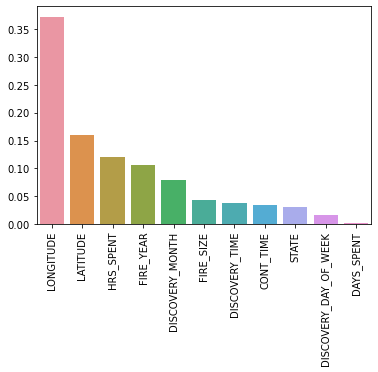

In [15]:
feature_cols=['FIRE_YEAR','LATITUDE', 'LONGITUDE','STATE','FIRE_SIZE','DISCOVERY_TIME','CONT_TIME','DISCOVERY_MONTH','DISCOVERY_DAY_OF_WEEK','DAYS_SPENT','HRS_SPENT','DISCOVERY YEAR']
feat_imps = zip (feature_cols, decision.feature_importances_)
feats, imps = zip(*sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True))
ax = sns.barplot(list(feats), list (imps))
ax.tick_params (axis='x', rotation=90)

In [35]:
#pruning (not working out because dataset is too large) 

In [36]:
path = decision.cost_complexity_pruning_path(X_dev, y_dev)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_dev, y_dev)
    clfs.append(clf)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_dev)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_dev, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='dev_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


plt.figure(figsize=(10, 10), dpi=1000)

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0010)
clf_.fit(df2_X_dev_s, df1_y_dev)
y_train_pred = clf_.predict(df2_X_dev_s)
y_test_pred = clf_.predict(df2_X_test_s)

print(f'Development accuracy score {accuracy_score(df1_y_dev, y_train_pred)}')
print(f'Test accuracy score {accuracy_score(df1_y_test, y_test_pred)}')

In [ ]:
#F1 score 
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_pred)
print("F1 score on test set is", f1_test)

f1_dev = f1_score(y_dev, y_pred_dev)
print("F1 score on development set is", f1_dev)

**Random Forest**

In [16]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state = 0)
clf_rf = clf_rf.fit(X_dev, y_dev)

y_pred = clf_rf.predict(X_test)
print("Accuracy on the test set is:",metrics.accuracy_score(y_test, y_pred))

y_pred_dev = clf_rf.predict(X_dev)
print("Accuracy on the development set is:",metrics.accuracy_score(y_dev, y_pred_dev))

Accuracy on the test set is: 0.6102173742446834
Accuracy on the development set is: 0.9995852047000792


In [17]:
# unable to do grid search because data is too large so it is taking forever to run

In [16]:
## YOUR CODE HERE   
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 6, 7, 8, 17, 35, 50],
    'n_estimators': [20, 40, 70, 75, 80, 90, 150]
}
# Create a based model
#rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid, 
                          cv = 3)

In [ ]:
grid_search.fit(X_dev, y_dev)
print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_best = RandomForestClassifier(random_state=0, max_depth=8, n_estimators=70)
rf_best.fit(df2_X_dev_s, df1_y_dev)
y_pred_rf_best = rf_best.predict(df2_X_test_s)

In [ ]:
# feature importance 

/Users/ritvikkhandelwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


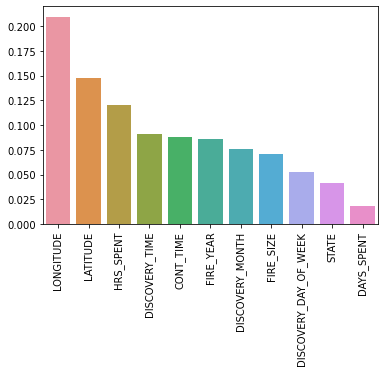

In [19]:
## YOUR CODE HERE
feature_cols=['FIRE_YEAR','LATITUDE', 'LONGITUDE','STATE','FIRE_SIZE','DISCOVERY_TIME','CONT_TIME','DISCOVERY_MONTH','DISCOVERY_DAY_OF_WEEK','DAYS_SPENT','HRS_SPENT','DISCOVERY YEAR']
feat_imps = zip (feature_cols, clf_rf.feature_importances_)
feats, imps = zip(*sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True))
ax = sns.barplot(list(feats), list (imps))
ax.tick_params (axis='x', rotation=90)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59     27771
           1       0.51      0.41      0.46     10366
           2       0.41      0.19      0.26      5465
           3       0.55      0.67      0.60     34401
           4       0.38      0.20      0.26      9811
           5       0.55      0.43      0.48      2053
           6       0.77      0.89      0.82     43919
           7       0.52      0.55      0.54     29506
           8       0.79      0.70      0.74      6967
           9       0.38      0.06      0.11      1548
          10       0.78      0.22      0.34      1581
          11       0.34      0.04      0.07      4495
          12       0.41      0.08      0.13       519

    accuracy                           0.61    178402
   macro avg       0.54      0.39      0.42    178402
weighted avg       0.59      0.61      0.59    178402

